Simple workflow

In [4]:
from langchain_openai import ChatOpenAI

In [2]:
from typing_extensions import TypedDict

# Graph state
class State(TypedDict):
    topic: str
    joke: str
    improved_joke: str
    final_joke: str


In [ ]:
import os
from dotenv import load_dotenv
load_dotenv()

llm = ChatOpenAI(
    model=os.getenv("LLM_MODEL", "gpt-4o-mini"),
    api_key=os.getenv("OPENAI_API_KEY"),

)

In [7]:
# Nodes

def generate_joke(state: State) -> str:
    msg = llm.invoke(f"Generate a joke about {state['topic']}")
    return {"joke": msg.content}

def improve_joke(state: State) -> str:
    msg = llm.invoke(f"Make the joke more funny by adding worldplay: {state['joke']}")
    return {"improved_joke": msg.content}

def generate_final_joke(state: State) -> str:
    msg = llm.invoke(f"Add a punchline to the joke: {state['improved_joke']}")
    return {"final_joke": msg.content}




In [8]:
# Conditional edge(gate )
def check_joke(state: State) -> str:
    if '?' in state['joke'] or '!' in state['joke']:
        return 'Pass'
    else:
        return 'Fail'

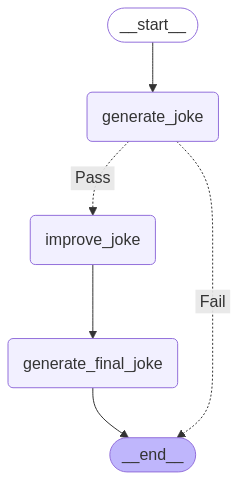

In [ ]:
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display

# Build the workflow
workflow = StateGraph(State)

# add nodes
workflow.add_node("generate_joke", generate_joke)
workflow.add_node("improve_joke", improve_joke)
workflow.add_node("generate_final_joke", generate_final_joke)

# add edges
workflow.add_edge(START, "generate_joke")
workflow.add_conditional_edges(
    "generate_joke",
    check_joke,
    {"Pass": "improve_joke", "Fail": END}
)

workflow.add_edge("improve_joke", "generate_final_joke")
workflow.add_edge("generate_final_joke", END)


chain = workflow.compile()

display(Image(chain.get_graph().draw_mermaid_png()))


In [14]:
state = chain.invoke({"topic": "dog"})
print('Initial joke: ', state['joke'])
print('-'*100)  
if 'improved_joke' in state:
    print('Improved joke: ', state['improved_joke'])
    print('-'*100)
    print('Final joke: ', state['final_joke'])
else:
    print('No improved joke generated')


Initial joke:  Why did the dog sit in the shade? 

Because it didn’t want to become a hot dog! 🐶🌭
----------------------------------------------------------------------------------------------------
Improved joke:  Why did the dog sit in the shade? 

Because it didn't want to become a *pawsitive* hot dog! 🐶🌭
----------------------------------------------------------------------------------------------------
Final joke:  Why did the dog sit in the shade? 

Because it didn't want to become a *pawsitive* hot dog! 🐶🌭 And it was tired of being the "bark" of the town!
